In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
# Load the digits dataset
digits = load_digits()
X = digits.data
y = digits.target
feature_names = digits.feature_names
print(feature_names)

['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']


In [3]:
len(X[0])

64

In [ ]:
len(X)

1797

In [ ]:
X[:1]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

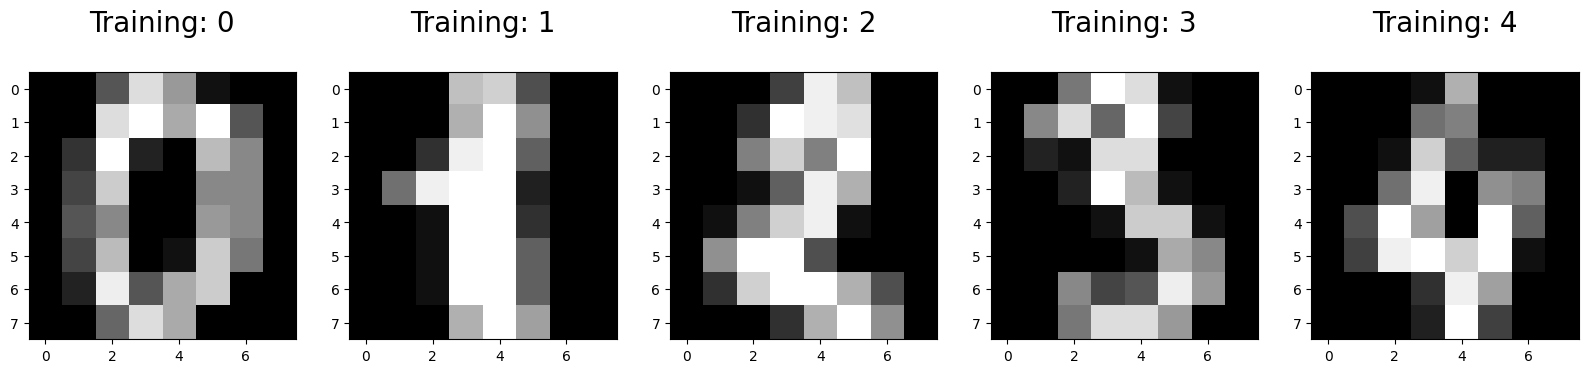

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(X[0:5], y[0:5])):
  plt.subplot(1, 5, index + 1)
  plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
  plt.title('Training: %i\n' % label, fontsize = 20)


In [ ]:
y[:5]

array([0, 1, 2, 3, 4])

In [ ]:
X.shape

(1797, 64)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# f_classif Feature Selection
selector = SelectKBest(score_func=f_classif, k=30)
X_selected = selector.fit_transform(X_scaled, y)
selected_features = [feature_names[i] for i in selector.get_support(indices=True)]

print(f"Selected features based on Z-score: {selected_features}")

Selected features based on Z-score: ['pixel_0_2', 'pixel_0_5', 'pixel_1_2', 'pixel_1_5', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_6', 'pixel_6_2', 'pixel_6_5', 'pixel_6_6', 'pixel_7_2', 'pixel_7_4', 'pixel_7_5']


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 0 32 39] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [ ]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [ ]:
# Function to train and evaluate the model
def train_evaluate(X_train, X_test, y_train, y_test, DR_name):
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, digits=4)
    print(f"\n{DR_name} - Accuracy: {accuracy}\n")
    print(f"{DR_name} - Classification Report:\n{report}\n")


In [ ]:
# Train and evaluate the model on the selected features
train_evaluate(X_train, X_test, y_train, y_test, "f_classif Feature Selection")


f_classif Feature Selection - Accuracy: 0.975

f_classif Feature Selection - Classification Report:
              precision    recall  f1-score   support

           0     1.0000    0.9697    0.9846        33
           1     0.9333    1.0000    0.9655        28
           2     1.0000    1.0000    1.0000        33
           3     1.0000    0.9706    0.9851        34
           4     0.9574    0.9783    0.9677        46
           5     0.9583    0.9787    0.9684        47
           6     0.9714    0.9714    0.9714        35
           7     0.9444    1.0000    0.9714        34
           8     1.0000    0.9333    0.9655        30
           9     1.0000    0.9500    0.9744        40

    accuracy                         0.9750       360
   macro avg     0.9765    0.9752    0.9754       360
weighted avg     0.9759    0.9750    0.9751       360




In [ ]:
len(X_scaled)
len(y)

1797

In [ ]:
print(min(X_scaled.shape[1], len(np.unique(y)) - 1))

9


In [ ]:
# Apply PCA
pca = PCA(n_components=20)
X_pca = pca.fit_transform(X_selected)
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train and evaluate the model on PCA features
train_evaluate(X_train_pca, X_test_pca, y_train_pca, y_test_pca, "PCA")


PCA - Accuracy: 0.9805555555555555

PCA - Classification Report:
              precision    recall  f1-score   support

           0     0.9706    1.0000    0.9851        33
           1     0.9032    1.0000    0.9492        28
           2     1.0000    1.0000    1.0000        33
           3     0.9714    1.0000    0.9855        34
           4     0.9787    1.0000    0.9892        46
           5     0.9787    0.9787    0.9787        47
           6     1.0000    1.0000    1.0000        35
           7     1.0000    1.0000    1.0000        34
           8     1.0000    0.9000    0.9474        30
           9     1.0000    0.9250    0.9610        40

    accuracy                         0.9806       360
   macro avg     0.9803    0.9804    0.9796       360
weighted avg     0.9816    0.9806    0.9804       360




In [ ]:
# Apply PCA
pca = PCA(n_components=20)
X_pca = pca.fit_transform(X_selected)
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train and evaluate the model on PCA features
train_evaluate(X_train_pca, X_test_pca, y_train_pca, y_test_pca, "PCA")

# Apply LDA
lda = LDA(n_components=min(X_selected.shape[1], len(np.unique(y)) - 1)) # Set n_components based on features and classes
X_lda = lda.fit_transform(X_selected, y)
X_train_lda, X_test_lda, y_train_lda, y_test_lda = train_test_split(X_lda, y, test_size=0.2, random_state=42)

# Train and evaluate the model on LDA features
train_evaluate(X_train_lda, X_test_lda, y_train_lda, y_test_lda, "LDA")

# Apply t-SNE
tsne = TSNE(n_components=3, random_state=42)
X_tsne = tsne.fit_transform(X_selected)
X_train_tsne, X_test_tsne, y_train_tsne, y_test_tsne = train_test_split(X_tsne, y, test_size=0.2, random_state=42)
# Train and evaluate the model on LDA features
train_evaluate(X_train_lda, X_test_lda, y_train_lda, y_test_lda, "TSNE")



PCA - Accuracy: 0.9805555555555555

PCA - Classification Report:
              precision    recall  f1-score   support

           0     0.9706    1.0000    0.9851        33
           1     0.9032    1.0000    0.9492        28
           2     1.0000    1.0000    1.0000        33
           3     0.9714    1.0000    0.9855        34
           4     0.9787    1.0000    0.9892        46
           5     0.9787    0.9787    0.9787        47
           6     1.0000    1.0000    1.0000        35
           7     1.0000    1.0000    1.0000        34
           8     1.0000    0.9000    0.9474        30
           9     1.0000    0.9250    0.9610        40

    accuracy                         0.9806       360
   macro avg     0.9803    0.9804    0.9796       360
weighted avg     0.9816    0.9806    0.9804       360



LDA - Accuracy: 0.9388888888888889

LDA - Classification Report:
              precision    recall  f1-score   support

           0     1.0000    0.9697    0.9846        33